## Ejercicio 3

In [350]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

In [351]:
def show_im(img):
    plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

In [352]:
clasificador=cv.CascadeClassifier("haarcascade_frontalface_default.xml")

In [353]:
img=cv.imread("letras.jpg")

In [354]:
img_g=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

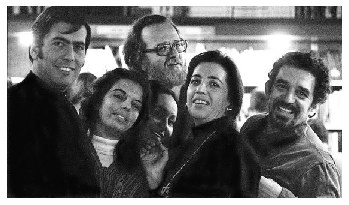

In [355]:
show_im(img_g)

In [356]:
img_g_eq=cv.equalizeHist(img_g)

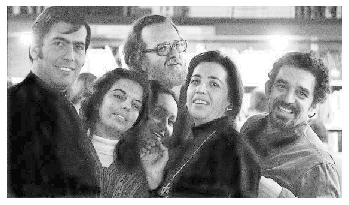

In [357]:
show_im(img_g_eq)

In [358]:
caras=clasificador.detectMultiScale(img_g_eq,scaleFactor=1.015,
                                                 minNeighbors=2,
                                                minSize=(50,50))

In [359]:
img_c=img.copy()
for x,y,l,a in caras:
    cv.rectangle(img_c,(x,y),(x+l,y+a),(0,0,255),2)

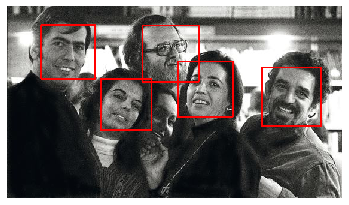

In [360]:
show_im(img_c)

In [361]:
for x,y,l,a in caras:
    cara=img_c[y:y+a,x:x+l]
    cara_difum=cv.GaussianBlur(cara,(15,15),5)
    img_c[y:y+a,x:x+l]=cara_difum

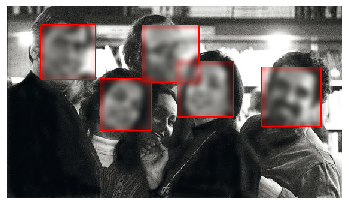

In [362]:
show_im(img_c)

## Ejercicio 4

In [363]:
img_d=img.copy()

In [364]:
for x,y,l,a in caras:
    cv.rectangle(img_d,(x,y),(x+l,y+a),(0,0,255),2)

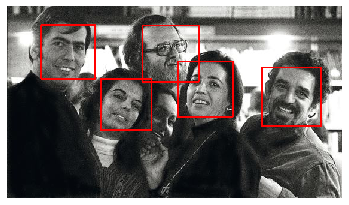

In [365]:
show_im(img_d)

In [366]:
for x,y,l,a in caras:
    cara=img_d[y:y+a,x:x+l]
    rot=cv.getRotationMatrix2D((a/2,l/2),180,1)
    img_rot=cv.warpAffine(cara,rot,(a,l))
    img_d[y:y+a,x:x+l]=img_rot

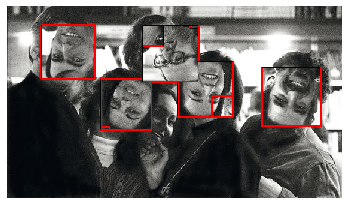

In [367]:
show_im(img_d)

In [374]:
for x,y,l,a in caras:
    cara=img_d[y:y+a,x:x+l]
    cara=cv.cvtColor(cara,cv.COLOR_BGR2GRAY)
    filtered_cara=cv.adaptiveThreshold(cara,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY_INV,11,5)
    img_d[y:y+a,x:x+l]=cv.cvtColor(filtered_cara,cv.COLOR_GRAY2BGR)

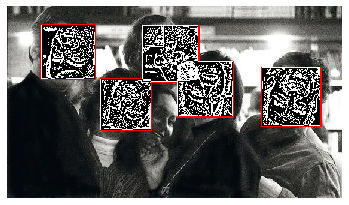

In [375]:
show_im(img_d)